<a href="https://colab.research.google.com/github/JosherenPro/Binary-Classification-with-a-Bank-Dataset/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploration et Analyse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Binary-Classification-with-a-Bank-Dataset/data/"
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')


X = train_data.drop(['y'], axis=1)
y = train_data['y']

print(X.shape)
print(y.shape)

(750000, 17)
(750000,)


In [5]:
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [7]:
train_data.isna().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [8]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

for col in cat_cols:
    print(f"{col}: {X[col].unique()}")

job: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'primary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [9]:
X.replace("unknown", np.nan, inplace=True)

print((X[cat_cols].isna().sum()/X.size)*100)

job          0.022878
marital      0.000000
education    0.167051
default      0.000000
housing      0.000000
loan         0.000000
contact      1.816682
month        0.000000
poutcome     5.274118
dtype: float64


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# On force à garder les noms
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
453635,453635,28,blue-collar,single,secondary,no,5090,yes,yes,NaN,12,may,1297,2,-1,0,NaN
11651,11651,51,technician,married,tertiary,no,1295,no,no,cellular,27,aug,119,9,-1,0,NaN
431999,431999,57,management,divorced,tertiary,no,0,no,no,cellular,29,jan,87,1,-1,0,NaN
529211,529211,48,blue-collar,single,primary,no,1323,yes,no,NaN,15,may,83,5,-1,0,NaN
110925,110925,38,admin.,married,secondary,no,659,yes,no,cellular,28,jul,534,4,-1,0,NaN


# Machine Learning

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Categorical steps for pipeline
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('scaler', StandardScaler())
])

# --- Pipeline pour colonnes numériques ---
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# --- Preprocessor complet ---
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
], remainder='drop')

In [12]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    'XGBoost': XGBClassifier(tree_method="hist", device="cuda", use_label_encoder=False, eval_metric="logloss"),
    'LightGBM': LGBMClassifier(),
}

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Exemple d'hyperparamètres à tester pour XGBoost

params = {
    'XGBoost': {
        'classifier__learning_rate': uniform(0.01, 0.2),  # valeurs continues entre 0.01 et 0.21
        'classifier__max_depth': randint(3, 10),          # entiers de 3 à 9
        'classifier__n_estimators': randint(50, 300),
        'classifier__subsample': uniform(0.6, 0.4),
        'classifier__colsample_bytree': uniform(0.6, 0.4)
    },
    'LightGBM': {
        'classifier__learning_rate': uniform(0.01, 0.2),
        'classifier__num_leaves': randint(20, 150),
        'classifier__n_estimators': randint(50, 300),
        'classifier__subsample': uniform(0.6, 0.4),
        'classifier__colsample_bytree': uniform(0.6, 0.4)
    }
}


n_iter_search = 20

best_models = {}

for model_name, model in models.items():
    pipeline_final = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    random_search = RandomizedSearchCV(
        pipeline_final,
        param_distributions=params[model_name],
        n_iter=n_iter_search,
        cv=3,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best {model_name} params:", random_search.best_params_)
    print(f"Best {model_name} score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost params: {'classifier__colsample_bytree': np.float64(0.672894435115225), 'classifier__learning_rate': np.float64(0.16107228206353053), 'classifier__max_depth': 8, 'classifier__n_estimators': 183, 'classifier__subsample': np.float64(0.6831766651472755)}
Best XGBoost score: 0.9641977652415076
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 72283, number of negative: 527717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.195572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120472 -> initscore=-1.987971
[LightGBM] [Info] Start training from score -1.987971
Best LightGBM params: {'classifier__colsample_bytree': np.float64(0.6831766

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

XGBModel = best_models['XGBoost']
LGBMModel = best_models['LightGBM']

estimators = [
    ('XGBosst', XGBModel),
    ('LightGBM', LGBMModel)
]

meta_model = RandomForestClassifier()
meta_model1 = LogisticRegression()

# Stacking
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba',  # on utilise les probabilités comme entrée
    n_jobs=-1
)

stacking_clf1 = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model1,
    cv=5,
    stack_method='predict_proba',  # on utilise les probabilités comme entrée
    n_jobs=-1
)


In [15]:
y_train

,y
453635,1
11651,0
431999,0
529211,0
110925,0
...,...
259178,0
365838,0
131932,0
671155,0


In [16]:
from sklearn.model_selection import cross_val_score


results = []

models = {
    'XGBoost': XGBModel,
    'LightGBM': LGBMModel,
    'Stacking_RF': stacking_clf,
    'Stacking_LR': stacking_clf1,
}

print(type(X_train))
for model_name, model in models.items():
    pipeline_final = Pipeline([
        ('classifier', model)
    ])
    cv_results = cross_val_score(pipeline_final, X_train, y_train, cv=3, scoring='roc_auc', error_score='raise')
    results.append(cv_results)

print(f"Scores: {results}")
print(f"Mean: {np.mean(results)}")
print(f"Std: {np.std(results)}")

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:04:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:729: UserWarning: [23:04:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:04:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/

[LightGBM] [Info] Number of positive: 48188, number of negative: 351812
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.132686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120470 -> initscore=-1.987987
[LightGBM] [Info] Start training from score -1.987987


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48189, number of negative: 351811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.195579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120472 -> initscore=-1.987963
[LightGBM] [Info] Start training from score -1.987963


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48189, number of negative: 351811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120472 -> initscore=-1.987963
[LightGBM] [Info] Start training from score -1.987963


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Scores: [array([0.96372005, 0.96426838, 0.96460487]), array([0.96391305, 0.96515496, 0.96550485]), array([0.94871739, 0.94910307, 0.94942778]), array([0.96472727, 0.9656664 , 0.96597885])]
Mean: 0.9608989103653839
Std: 0.0068542510705527915


In [17]:
path = "/content/drive/MyDrive/Binary-Classification-with-a-Bank-Dataset/"

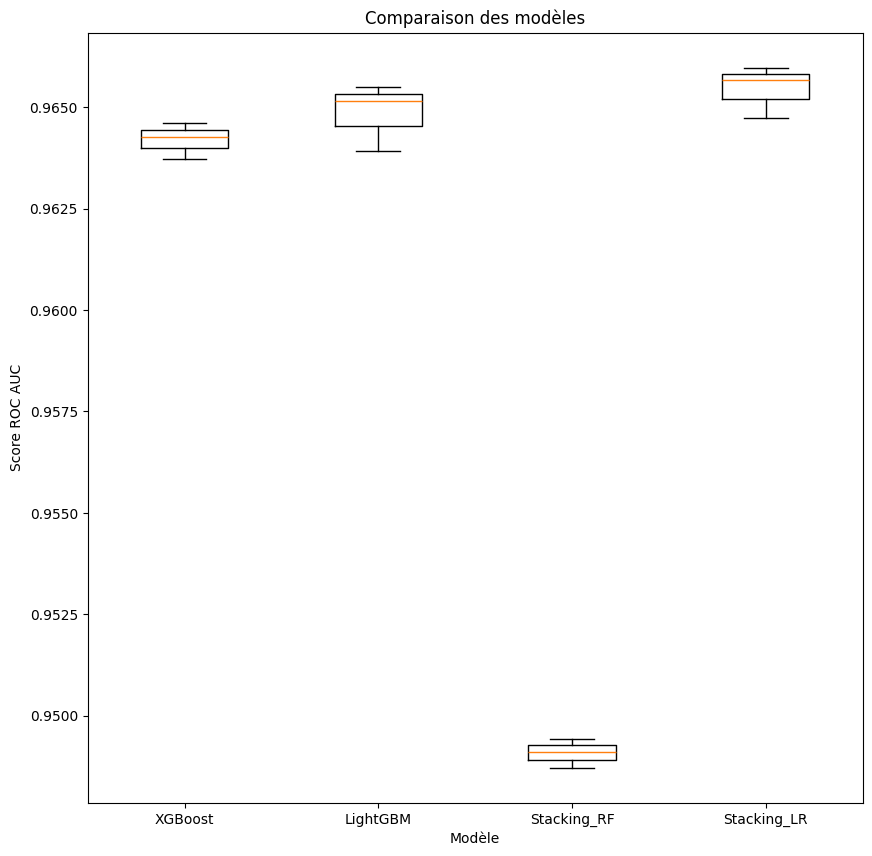

In [18]:
plt.figure(figsize=(10, 10))
plt.boxplot(results, tick_labels=models.keys())
plt.xlabel('Modèle')
plt.ylabel('Score ROC AUC')
plt.title('Comparaison des modèles')
plt.savefig(path + 'comparaison_modeles.png')
plt.show()

In [19]:
stacking_clf1.fit(X, y)
y_pred_proba = stacking_clf1.predict_proba(test_data)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [20]:
submission = pd.DataFrame({'id': test_data['id'], 'y': y_pred_proba})
submission.to_csv(path + 'submission.csv', index=False)